## Loan Eligibility Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Train dataset is used to train the model, it will have all the labels assigned to it. 
# Using this dataset, we will develop a model and test its accuracy

dataset = pd.read_csv("C:\\Users\\prabh\\OneDrive\\Desktop\\ML Course Notes\\Lecture 6\\train.csv")

In [3]:
# Explore the datasset

dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Dimensions of dataset

dataset.shape

(614, 13)

### **Dataset Description**
The loan eligibility dataset contains information about loan applicants and whether their loan applications were approved or denied. The dataset consists of 13 columns and 614 rows, with each row representing a single loan application.The columns in the dataset include:

1. **Loan_ID**: a unique identifier for each loan application
2. **Gender**: the gender of the applicant (male or female)
3. **Married**: whether the applicant is married or not (yes or no)
4. **Dependents**: the number of dependents the applicant has (0, 1, 2, or 3+)
5. **Education**: the education level of the applicant (graduate or not)
6. **Self_Employed**: whether the applicant is self-employed or not (yes or no)
7. **ApplicantIncome**: the income of the applicant
8. **CoapplicantIncome**: the income of the co-applicant (if any)
9. **LoanAmount**: the amount of the loan requested
10. **Loan_Amount_Term**: the term of the loan in months
11. **Credit_History**: a binary variable indicating whether the applicant has a credit history or not (1 = has credit history, 0 = no credit history)
12. **Property_Area**: the area where the property associated with the loan is located (urban, suburban, or rural)
13. **Loan_Status**: whether the loan application was approved or denied (Y = approved, N = denied)

In [5]:
# Information about the dataframe

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Summary stats of the dataframe

dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Crosstab is the tabulation of two categorical variables
# How credit histoy affects the loan status

pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


#### **Analyse Loan_status**

<Axes: xlabel='Loan_Status', ylabel='count'>

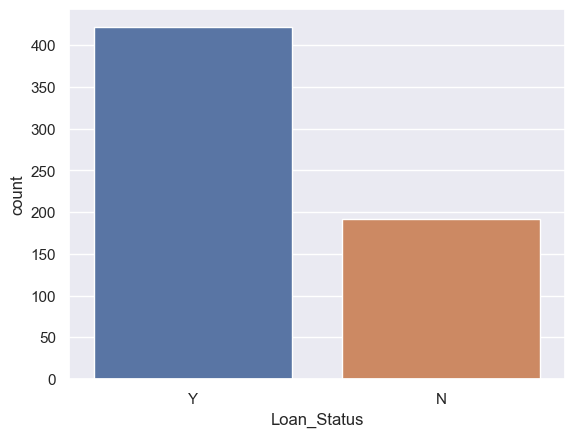

In [8]:
sns.countplot(x = dataset['Loan_Status'], hue = dataset['Loan_Status'])

##### The loan approval dataset exhibits a substantial class imbalance, with a majority of applications approved (422 instances) compared to rejected ones (192 instances).

#### **Analyse Gender**

Text(0.5, 1.0, 'Distribution of Genders')

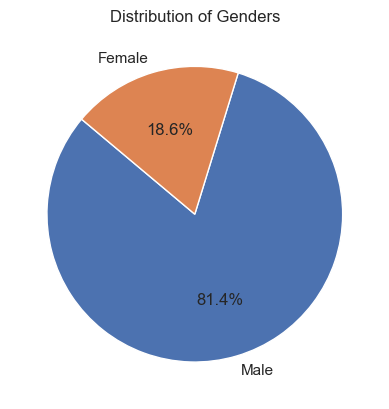

In [9]:
gender_counts = dataset['Gender'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Genders')

##### The dataset shows a gender imbalance, with approximately 81% male loan applicants and 18.6% female applicants, visually enhanced by a custom color palette.

#### **Analyse Education**

<Axes: xlabel='Education', ylabel='count'>

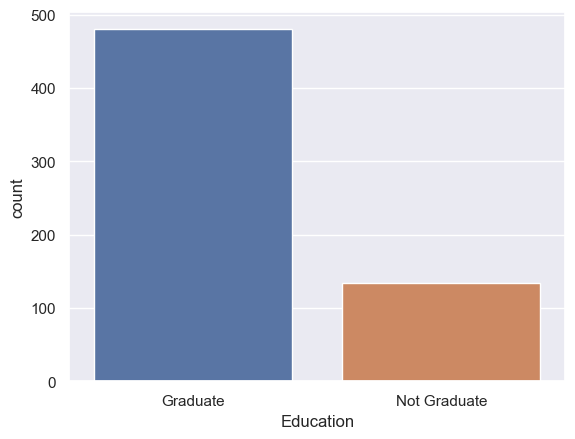

In [10]:
sns.countplot(x = dataset['Education'], hue = dataset['Education'])

##### 78.2% of loan applicants are graduates, with 480 graduate applicants compared to 134 non-graduates.

#### **Analyse Property_Area**

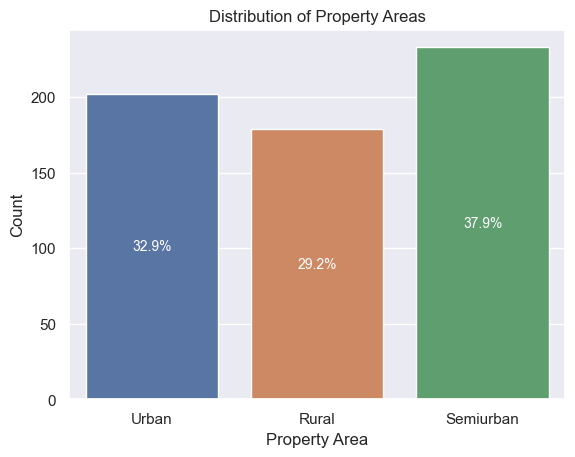

In [11]:
ax = sns.countplot(x=dataset['Property_Area'], hue=dataset['Property_Area'])

total = len(dataset['Property_Area'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height / 2),
                ha='center', va='center', fontsize=10, color='white')

plt.title('Distribution of Property Areas')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

##### Semiurban dominates with 233 counts, making up 37.9% of the total, followed by Urban (202) and Rural (179), suggesting a notable disparity between Semiurban and the other areas.

#### **Analyse ApplicantIncome**

<Axes: >

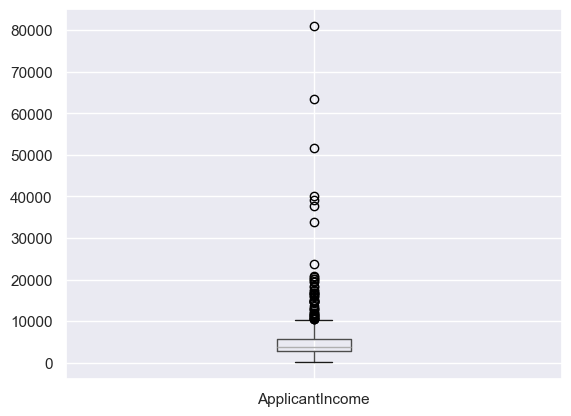

In [12]:
# The boxplot shows a lot of outliers
# Outliers (data points located outside the whiskers of the boxplot)

dataset.boxplot(column='ApplicantIncome')

<Axes: >

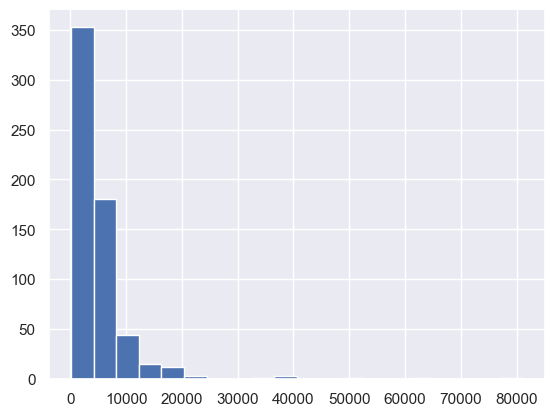

In [13]:
# The histogram shows the data is right skewed
# so we will normalize the data to get better results.

dataset['ApplicantIncome'].hist(bins=20)

##### Income distribution is right-skewed, with most applicants earning between 0 to 25,000. Few outliers have incomes above 80,000.

#### **Analyse CoapplicantIncome**

<Axes: ylabel='CoapplicantIncome'>

C:\Users\prabh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 40.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


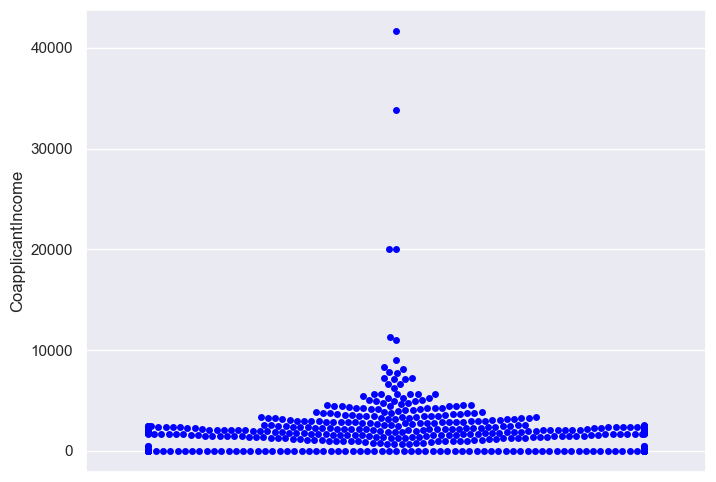

In [14]:
plt.figure(figsize=(8, 6))
sns.swarmplot(y=dataset['CoapplicantIncome'], color='blue')

<Axes: >

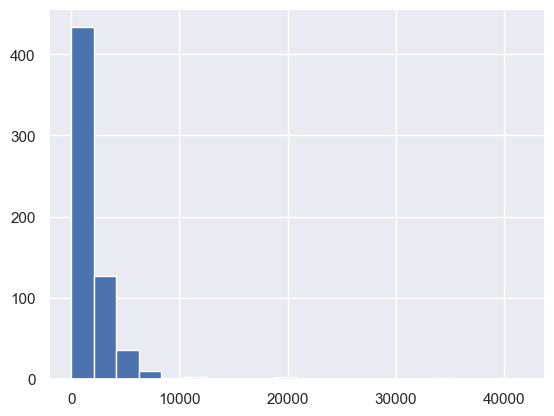

In [15]:
dataset['CoapplicantIncome'].hist(bins=20)

##### The co-applicant income distribution is heavily right-skewed, with most applicants having either no or low income, while a few outliers show high income, indicating limited dependency on co-applicants for loan applications.

#### **Analyse LoanAmount**

<Axes: xlabel='LoanAmount', ylabel='Count'>

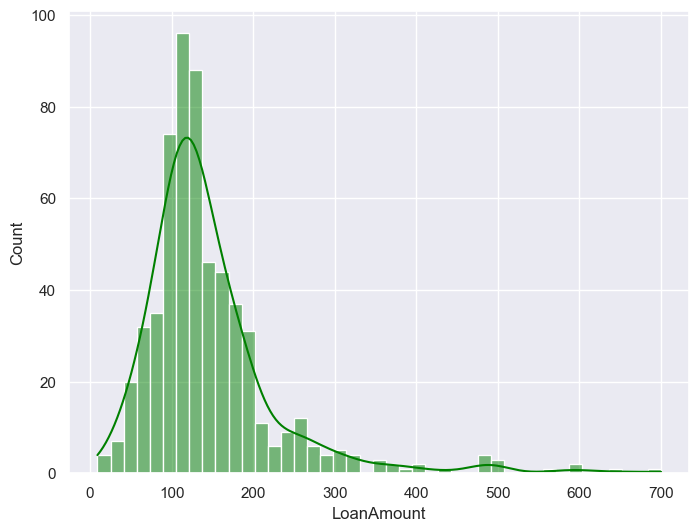

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['LoanAmount'], kde=True, color='green')

<Axes: >

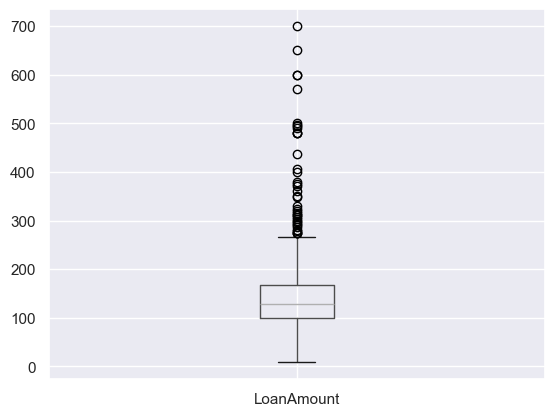

In [17]:
dataset.boxplot(column='LoanAmount')

<Axes: >

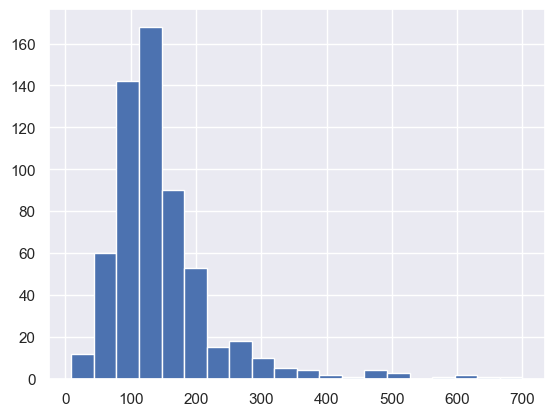

In [18]:
dataset['LoanAmount'].hist(bins=20)

##### The loan amount distribution is right-skewed, with a majority of loans concentrated towards the lower end, while some individuals have taken out very large loans, resulting in a long tail towards higher values.

#### **Analyse Credit_History**

<Axes: xlabel='Credit_History', ylabel='count'>

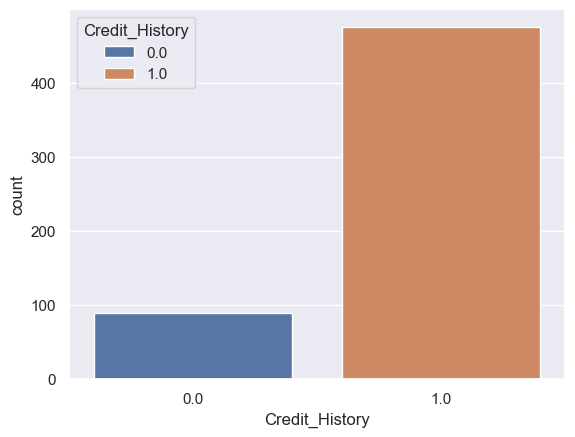

In [19]:
sns.countplot(x = dataset['Credit_History'], hue = dataset['Credit_History'])

##### Most applicants have a credit history ('1.0'), outnumbering those without ('0.0'), with around 100 applicants falling in the latter category, suggesting its significance in loan approval prediction.

#### **Analyse Loan_Amount_Term**

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

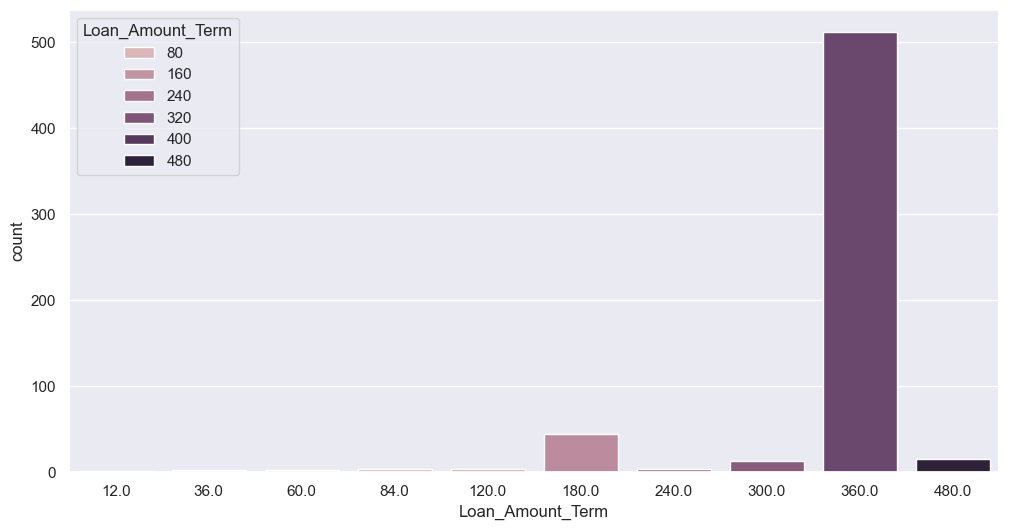

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x = dataset['Loan_Amount_Term'], hue = dataset['Loan_Amount_Term'])

##### Most borrowers prefer a 30-year loan term, with 360 months being the most common, followed by 180 months, 480 months, and 300 months. Few instances exist for terms less than 180 months, with 12 months being the least common.

#### **ApplicantIncome with Education**

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

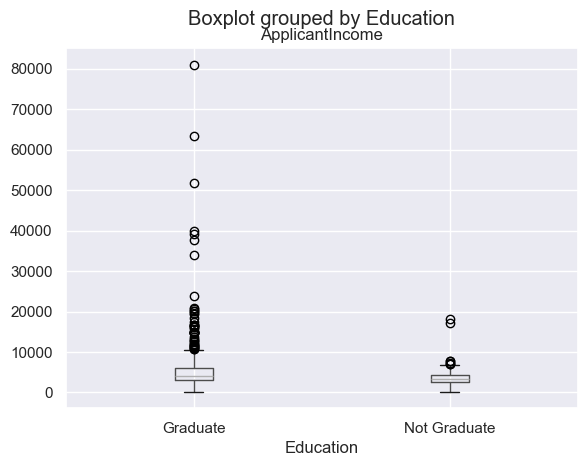

In [21]:
dataset.boxplot(column='ApplicantIncome', by='Education')

# **Normalization**

<Axes: >

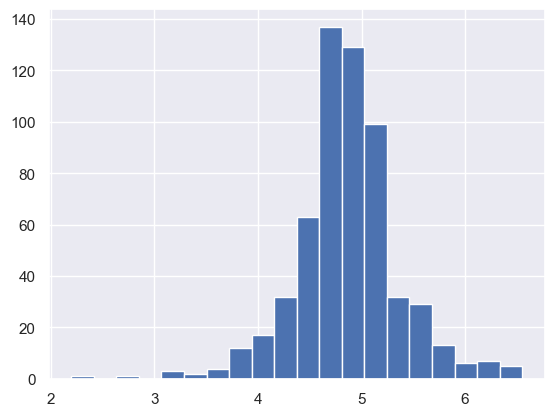

In [22]:
# Normalizing the data using log function
# Normalizing means rescaling the real valued numeric atributes into a range.
# This leads to higher accuracy

dataset['LoanAmount_log']=np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

<Axes: >

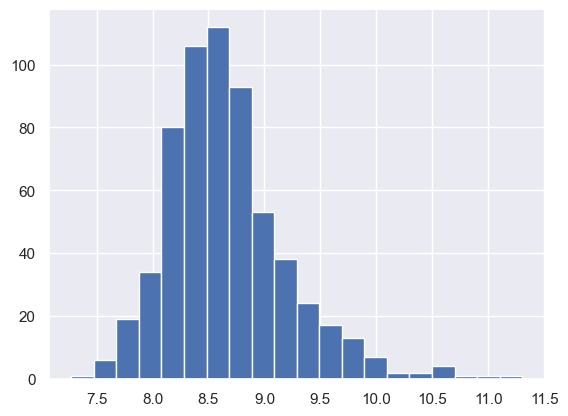

In [23]:
# Narmalizing the total income, using log

dataset['TotalIncome']=dataset['ApplicantIncome']+dataset['CoapplicantIncome']
dataset['TotalIncome_log']=np.log(dataset['TotalIncome'])
dataset['TotalIncome_log'].hist(bins=20)

In [24]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


# **Handling Outliers**

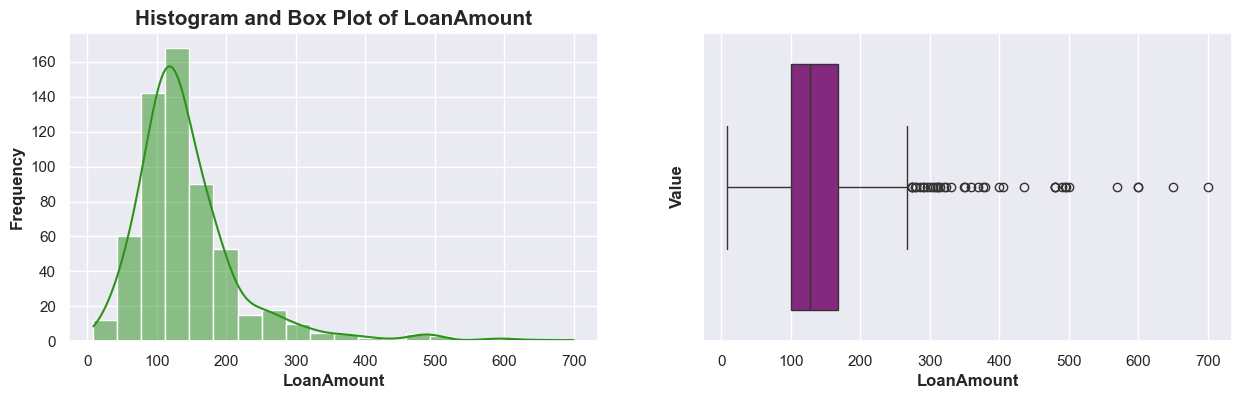

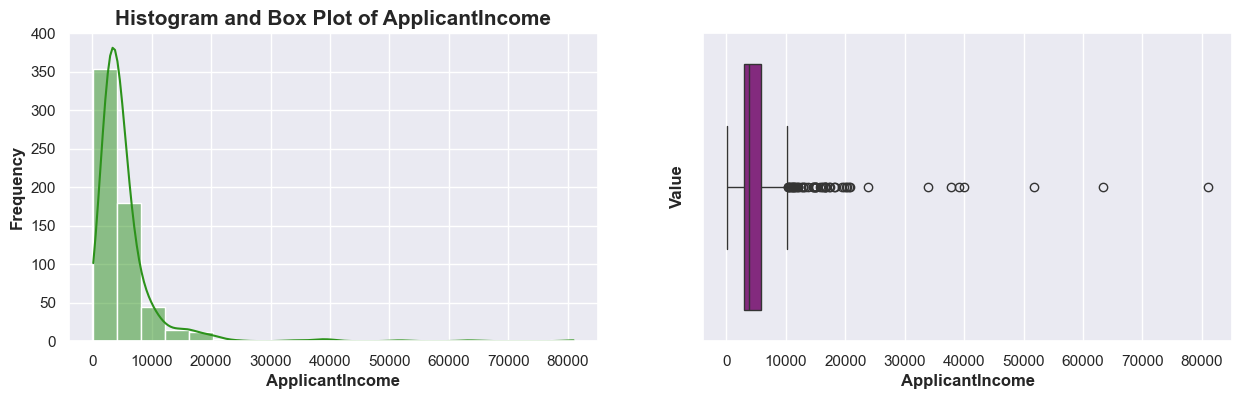

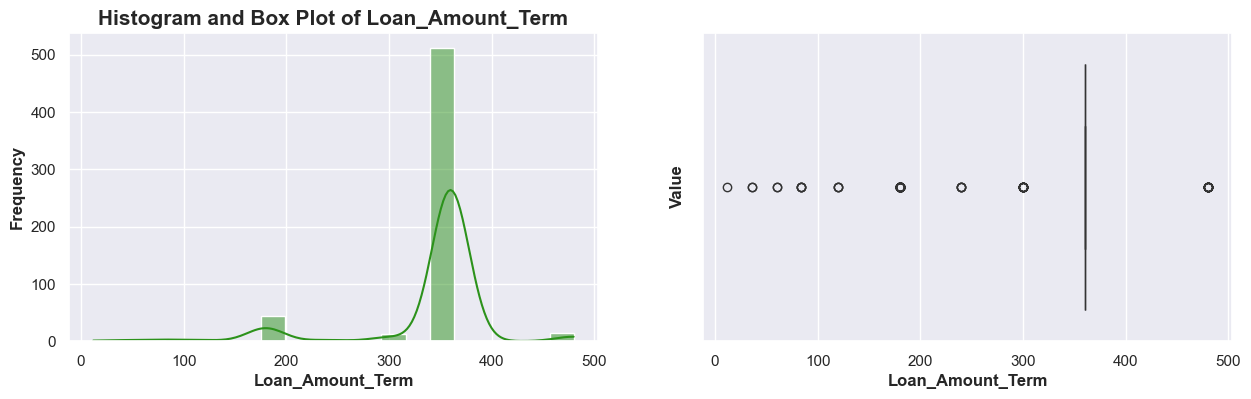

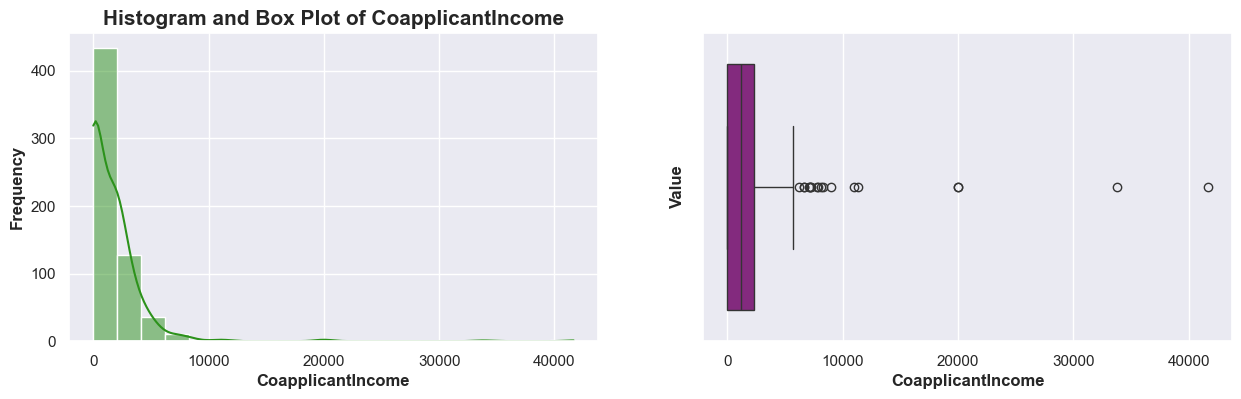

In [25]:
# List of columns with outliers
col_outliers = ["LoanAmount", "ApplicantIncome", "Loan_Amount_Term", "CoapplicantIncome"]

for col in col_outliers:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))
    sns.histplot(data=dataset, x=col, bins=20, kde=True, ax=ax1, color='#2c921b')
    sns.boxplot(data=dataset, x=col, ax=ax2, color='#921b8b')
    ax1.set_title(f"Histogram and Box Plot of {col}", size=15, weight='bold')
    ax1.set_xlabel(col, size=12, weight='bold')
    ax1.set_ylabel("Frequency", size=12, weight='bold')
    ax2.set_xlabel(col, size=12, weight='bold')
    ax2.set_ylabel("Value", size=12, weight='bold')
    plt.show()

This function `remove_outliers` takes a DataFrame `data`, a list of `columns` to inspect for outliers, and an optional threshold `k` for the interquartile range (default is 1.5). It iterates over each specified column, calculates quartiles and the interquartile range (IQR), defines outlier bounds, and filters the DataFrame to exclude rows with values outside these bounds. Finally, it returns the filtered DataFrame without outliers. Adjusting `k` controls the strictness of outlier removal.

In [26]:
def remove_outliers(data, columns, k=1.5):
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

columns = ['LoanAmount', 'ApplicantIncome', 'Loan_Amount_Term', 'CoapplicantIncome']
data = remove_outliers(dataset, columns)

# **Handling Missing Values**

In [27]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [28]:
# For categorical data, mode will be used

mode_value = dataset['Gender'].mode()[0]
dataset['Gender'] = dataset['Gender'].fillna(mode_value)

In [29]:
mode_value = dataset['Married'].mode()[0]
dataset['Married'] = dataset['Married'].fillna(mode_value)

In [30]:
mode_value = dataset['Dependents'].mode()[0]
dataset['Dependents'] = dataset['Dependents'].fillna(mode_value)

In [31]:
mode_value = dataset['Self_Employed'].mode()[0]
dataset['Self_Employed'] = dataset['Self_Employed'].fillna(mode_value)

In [32]:
mode_value = dataset['Loan_Amount_Term'].mode()[0]
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(mode_value)

In [33]:
mode_value = dataset['Credit_History'].mode()[0]
dataset['Credit_History'] = dataset['Credit_History'].fillna(mode_value)

In [34]:
# For numerical data, mean will be used

dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset.LoanAmount_log = dataset.LoanAmount_log.fillna(dataset.LoanAmount_log.mean())

In [35]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

# **Splitting the dataset**

In [36]:
# Dividing the data into dependent and independent variables
# X is independent variables, y is dependent variable (Loan Status)

X= dataset.iloc[:,np.r_[1:5,9:11,13:15]].values
y= dataset.iloc[:,12].values

In [37]:
X 

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [38]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [39]:
#Split the dataset into train and test dataset
#80% training data, 20% testing data
#random state = 0 means result will be same for every cycle

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
print(X_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


# **Label Encoding**

In [41]:
# X_train has categorical values
# but we need to convert them into 0 and 1, for the computer to understand.
# LabelEncoder to convert categorical text into numerical format

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [42]:
for i in range(0,5):
    X_train[:,i]=labelencoder_X.fit_transform(X_train[:,i])

In [43]:
X_train[:,i] = labelencoder_X.fit_transform(X_train[:,7])

In [44]:
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 5858.0],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 11250.0],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 8334.0],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 6033.0],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 6486.0]], dtype=object)

In [45]:
# Creating new instance of labelEncoder

labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [46]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [47]:
for i in range(0,5):
    X_test[:,i]=labelencoder_X.fit_transform(X_test[:,i])

In [48]:
X_test[:,i] = labelencoder_X.fit_transform(X_test[:,7])

In [49]:
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [50]:
X_test

array([[1, 0, 0, 0, 85, 1.0, 4.430816798843313, 7085.0],
       [0, 0, 0, 0, 28, 1.0, 4.718498871295094, 4230.0],
       [1, 1, 0, 0, 104, 1.0, 5.780743515792329, 10039.0],
       [1, 1, 0, 0, 80, 1.0, 4.700480365792417, 6784.0],
       [1, 1, 2, 0, 22, 1.0, 4.574710978503383, 3875.0],
       [1, 1, 0, 1, 70, 0.0, 5.10594547390058, 6058.0],
       [1, 1, 3, 0, 77, 1.0, 5.056245805348308, 6417.0],
       [1, 0, 0, 0, 114, 1.0, 6.003887067106539, 12876.0],
       [1, 0, 0, 0, 53, 0.0, 4.820281565605037, 5124.0],
       [1, 1, 0, 0, 55, 1.0, 4.852030263919617, 5233.0],
       [0, 0, 0, 0, 4, 1.0, 4.430816798843313, 2917.0],
       [1, 1, 1, 0, 2, 1.0, 4.553876891600541, 2895.0],
       [0, 0, 0, 0, 96, 1.0, 5.634789603169249, 8333.0],
       [1, 1, 2, 0, 97, 1.0, 5.4638318050256105, 8667.0],
       [1, 1, 0, 0, 117, 1.0, 4.564348191467836, 14880.0],
       [1, 1, 1, 0, 22, 1.0, 4.204692619390966, 3875.0],
       [1, 0, 1, 1, 32, 1.0, 5.247024072160486, 4311.0],
       [1, 0, 0, 1, 25, 1.0

In [51]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

# **Scaling**

In [52]:
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 5858.0],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 11250.0],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 8334.0],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 6033.0],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 6486.0]], dtype=object)

In [53]:
X_test

array([[1, 0, 0, 0, 85, 1.0, 4.430816798843313, 7085.0],
       [0, 0, 0, 0, 28, 1.0, 4.718498871295094, 4230.0],
       [1, 1, 0, 0, 104, 1.0, 5.780743515792329, 10039.0],
       [1, 1, 0, 0, 80, 1.0, 4.700480365792417, 6784.0],
       [1, 1, 2, 0, 22, 1.0, 4.574710978503383, 3875.0],
       [1, 1, 0, 1, 70, 0.0, 5.10594547390058, 6058.0],
       [1, 1, 3, 0, 77, 1.0, 5.056245805348308, 6417.0],
       [1, 0, 0, 0, 114, 1.0, 6.003887067106539, 12876.0],
       [1, 0, 0, 0, 53, 0.0, 4.820281565605037, 5124.0],
       [1, 1, 0, 0, 55, 1.0, 4.852030263919617, 5233.0],
       [0, 0, 0, 0, 4, 1.0, 4.430816798843313, 2917.0],
       [1, 1, 1, 0, 2, 1.0, 4.553876891600541, 2895.0],
       [0, 0, 0, 0, 96, 1.0, 5.634789603169249, 8333.0],
       [1, 1, 2, 0, 97, 1.0, 5.4638318050256105, 8667.0],
       [1, 1, 0, 0, 117, 1.0, 4.564348191467836, 14880.0],
       [1, 1, 1, 0, 22, 1.0, 4.204692619390966, 3875.0],
       [1, 0, 1, 1, 32, 1.0, 5.247024072160486, 4311.0],
       [1, 0, 0, 1, 25, 1.0

In [54]:
# Scaling the data, as there are different variables in the dataset with different range.
# Scaling helps in speeding up the calculations in the algorithm.

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [55]:
X_train

array([[ 0.47374983,  0.71143163, -0.76304669, ...,  0.41790088,
         0.03484798, -0.18578759],
       [ 0.47374983, -1.40561644,  0.22549137, ...,  0.41790088,
         0.83102078,  0.59265746],
       [ 0.47374983,  0.71143163, -0.76304669, ..., -2.39291191,
         0.28925857, -0.21134115],
       ...,
       [ 0.47374983,  0.71143163,  2.2025675 , ...,  0.41790088,
         0.87094174,  0.17167345],
       [ 0.47374983,  0.71143163, -0.76304669, ...,  0.41790088,
         0.43000557, -0.16052278],
       [-2.11081869,  0.71143163, -0.76304669, ...,  0.41790088,
         0.68458193, -0.095123  ]])

In [56]:
X_test

array([[ 4.66713812e-01, -1.25000000e+00, -6.40593614e-01,
        -5.17726991e-01,  7.32623333e-01,  3.86694596e-01,
        -9.44182815e-01,  1.34657546e-01],
       [-2.14264068e+00, -1.25000000e+00, -6.40593614e-01,
        -5.17726991e-01, -8.95402716e-01,  3.86694596e-01,
        -3.06802355e-01, -5.77249733e-01],
       [ 4.66713812e-01,  8.00000000e-01, -6.40593614e-01,
        -5.17726991e-01,  1.27529868e+00,  3.86694596e-01,
         2.04667756e+00,  8.71250927e-01],
       [ 4.66713812e-01,  8.00000000e-01, -6.40593614e-01,
        -5.17726991e-01,  5.89814030e-01,  3.86694596e-01,
        -3.46723659e-01,  5.96018225e-02],
       [ 4.66713812e-01,  8.00000000e-01,  1.37974009e+00,
        -5.17726991e-01, -1.06677388e+00,  3.86694596e-01,
        -6.25374842e-01, -6.65770603e-01],
       [ 4.66713812e-01,  8.00000000e-01, -6.40593614e-01,
         1.93151993e+00,  3.04195425e-01, -2.58602011e+00,
         5.51613645e-01, -1.21429591e-01],
       [ 4.66713812e-01,  8.000000